# Customer Recommendation System

## Introduction

In this project, we were given transactional data, and we will use that data to analyse customer behaviour and patterns to create our recommendation system. First, we will **transform this dataset to segment our customers into different groups to find patterns**, which will help in our analysis (clustering them using **K-means clustering**).

## Approach

We will use a standard data scientist approach to the problem.
1. Objective: Utilising the transaction dataset to create a Recommendation System.

2. Data Preparation:
   * In this project we will use [**<u>ecommerce data</u>**](https://www.kaggle.com/datasets/carrie1/ecommerce-data). We transform and clean the data into a usable format.

3. Data Preprocessing:
   * Creating new features to better support the analysis and model development. Streamline the data by feature scaling and dimensionality reduction.
  
4. Segmentation:
   * Using K-means clustering, segmenting the customers into distinct groups.
  
5. Analysis:
   * Analysing and evaluating the clusters to develop market strategies.
  
6. Recommendation System:
   * Finalising the Recommendation system and evaluating its efficiency with our project's objective.

### Setting Up the environment.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-data/data.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

## Data Preparation

In [3]:
df = pd.read_csv('/kaggle/input/ecommerce-data/data.csv', encoding ="latin1" )
df.head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.isnull().sum()
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#### Observation !!
From above steps we have observed that we have missing values in Description column, and customerID coulumn. It is also noticeable that the same customer has ordered multiple times on the same day.

In [6]:
# Summary Statistic for numerical variable
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
# Summary statistics for categorical variable
df.describe(include='object')

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


#### Observations !!!
**Quantity:** 
Mean: 9.55
Range: -80995 to 80995. Negative shows the return and cancelled items.
SD: 218.08. A high standard deviation indicates outliers or a large spread of data points.

Existence of outlier confirmed by difference in 75th percentile value and max value.

**UnitPrice:**
Mean: 4.61
Range: -11062.06 to 38970. wide spread in prices and error because of negative value.
SD: 96.7 .  A high standard deviation indicates outliers or a large spread of data points.
existence of outlier confirmed with difference in 75th percentile and maximum value.

**CustomerID:**
Count: 406829 values. Therefore nearly 25% of missing values.

**Invoice  Number**
25900 unique values means 25900 transactions.
1114 frequency means 1114 items were there in a transaction.

**StokeCode**
4070 unique values, means 4070 different products.
Most popular item 85123A, occurs in transaction for 2313 times.

**Description**
Count: 540455 values. Means 1454 missing values.
4223 unique descriptions.
>Note!: 4223 unique descriptions when there are 4070 unique products. (Need to look into that...)

Most Popular Item: White Hanging Heart T-Light Holder. occurred 2369 times in transactions.

**Country**
Most Frequent transactions were done between UK among 38 countries, with a frequency of 495478.

In [8]:
missing_values = df.isna().sum()
print(missing_values)
print(type(missing_values))
print(missing_values.shape)
print(missing_values.size)

missing_percentage = (missing_values[missing_values>0]/df.shape[0]) * 100
print(missing_percentage)
print(missing_percentage.shape)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
<class 'pandas.core.series.Series'>
(8,)
8
Description     0.268311
CustomerID     24.926694
dtype: float64
(2,)


In [9]:
print(df['CustomerID'].nunique())
len(df['CustomerID'].unique())
print(df[df['CustomerID'].isna()])

4372
       InvoiceNo StockCode                      Description  Quantity  \
622       536414     22139                              NaN        56   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

            InvoiceDate  UnitPrice  CustomerID         Country  
622     12/1/2010 11:52       0.00         NaN  Unite

#### Let's try filling missing values
Since we know that StockCode is unique and has a unique description for each item, we can map missing values with the help of StockCode. 
And CustomerID, we know InvoiceNo is unique, we can try to map CustomerID in a similar way.


In [10]:
df_new = df.copy()
df_new['Description'] = df.groupby('StockCode')['Description'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
df_new['CustomerID'] = df.groupby('InvoiceNo')['CustomerID'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

print(df_new.isna().sum())
print(df_new.describe(include = 'object'))

InvoiceNo           0
StockCode           0
Description       112
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
       InvoiceNo StockCode                         Description  \
count     541909    541909                              541797   
unique     25900      4070                                4223   
top       573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER   
freq        1114      2313                                2369   

             InvoiceDate         Country  
count             541909          541909  
unique             23260              38  
top     10/31/2011 14:41  United Kingdom  
freq                1114          495478  


#### Observation!!!
After filling in the missing values we observed there were no change in CUstomerID missing values. that means the missing CustomerId cannot be mapped from InvoiceNo.
The best way to deal with it is to remove the rows with missing values entirely, otherwise it will cause hinderance with our recommendation system.

In [11]:
df_new = df.dropna(subset = ['CustomerID', 'Description'])
print(df_new.isna().sum())
df_new.info()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


#### Now checking if there are any duplicates
If there are entries with same values across all columns, that means they is error in recoding. There we will remove duplicates.

In [12]:
print(df_new.duplicated().sum())
df_new.drop_duplicates(inplace = True)


5225


#### Handling negative values
We remember that quantity and UnitPrice had negative numbers in df.describe(), which represents return or cancelled transactions.
Therefore, let's handle negative values to understand our data in depth.

We will create a new column with transactions completed or cancelled status.

In [13]:
df_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [14]:
df_new['Status'] = np.where(df_new['InvoiceNo'].astype(str).str.startswith('C'), "Cancelled", "Completed")
df_new.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


#### Stat Analysis for all the cancelled transactions

In [15]:
cancelled_transactions = df_new[df_new['Status'] == 'Cancelled']
cancelled_transactions.describe().drop('CustomerID', axis=1)

,Quantity,UnitPrice
count,8872.000000,8872.000000
mean,-30.774910,18.899512
std,1172.249902,445.190864
min,-80995.000000,0.010000
25%,-6.000000,1.450000
50%,-2.000000,2.950000
75%,-1.000000,4.950000
max,-1.000000,38970.000000


#### How Does the cancelled Data looks?

In [16]:
df_new[df_new.Status == 'Cancelled'].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Status
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,Cancelled
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,Cancelled
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,Cancelled
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,Cancelled
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,Cancelled


Lets calculate how the percentage of cancelled transactions are there?

In [17]:
df_new[df_new.Status == "Cancelled"].shape[0] / df_new.shape[0] *100

2.209141343213713

Since above we know there are 4070 unique StokeCodes, but we have made lot of changes to the data, so to be on the safe side lets check it again.

In [18]:
df_new.StockCode.nunique()

3684

So, now we have 3684 unique stock codes after cleaning our dataset. BUilding on this Lets visualise and analyse our to 10 most popular products.

Text(0.5, 1.0, 'Top 10 popular StockCodes')

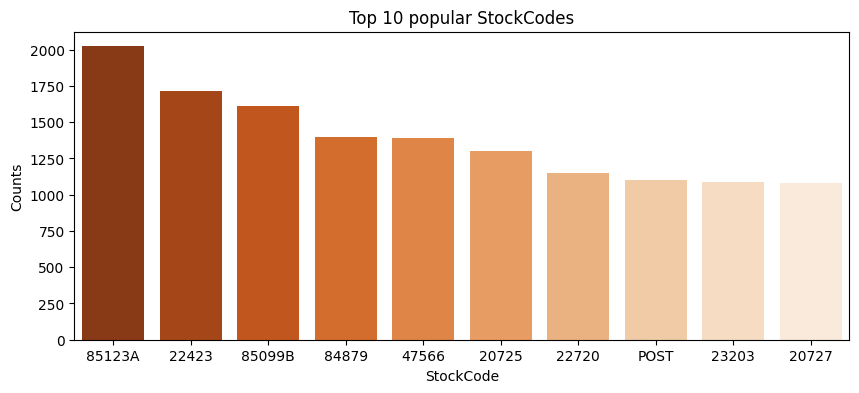

In [19]:
stock_codes_counts = df_new[df_new.Status == "Completed"].StockCode.value_counts().sort_values(ascending = False)
plt.figure(figsize=(10,4))
sns.barplot(x = stock_codes_counts.head(10).index,
            y = stock_codes_counts.head(10).values,
            palette = "Oranges_r")
plt.ylabel("Counts")
plt.xlabel("StockCode")
plt.title("Top 10 popular StockCodes")

We observed that there is an anomaly "POST", which doesn't sound like a product stockCode. SO, we can conclude that there might be other anomalies. Since we understand StockCode has digits in it so we can seperate from non-digit stock codes. And stock code of a product strts with digits. so we can check first 3 character should be a digit.

In [20]:
print(df_new.shape)
df_new["StockCode"].str[0:3].apply(lambda x : x.isdigit()).sum()
df_new['Num_StockCode'] = df_new["StockCode"].str[0:3].apply(lambda x : x.isdigit())
df_new[df_new.Num_StockCode == False].head(10)

(401604, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Status,Num_StockCode
45,536370,POST,POSTAGE,3,12/1/2010 8:45,18.00,12583.0,France,Completed,False
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,Cancelled,False
386,536403,POST,POSTAGE,1,12/1/2010 11:27,15.00,12791.0,Netherlands,Completed,False
1123,536527,POST,POSTAGE,1,12/1/2010 13:04,18.00,12662.0,Germany,Completed,False
1423,536540,C2,CARRIAGE,1,12/1/2010 14:05,50.00,14911.0,EIRE,Completed,False
2239,536569,M,Manual,1,12/1/2010 15:35,1.25,16274.0,United Kingdom,Completed,False
2250,536569,M,Manual,1,12/1/2010 15:35,18.95,16274.0,United Kingdom,Completed,False
4406,536779,BANK CHARGES,Bank Charges,1,12/2/2010 15:08,15.00,15823.0,United Kingdom,Completed,False
5073,536840,POST,POSTAGE,1,12/2/2010 18:27,18.00,12738.0,Germany,Completed,False
5258,536852,POST,POSTAGE,1,12/3/2010 9:51,18.00,12686.0,France,Completed,False


In [21]:
# Removing enteries with non-digit stock codes.
df_new = df_new[df_new.Num_StockCode == True]
df_new.head()
print(df_new.shape)

(399689, 10)


Now lets move to Decription column, from above observation we have notice the description is mix of Capital letter and lower case letters. Lets look into it, and see whether there is ana nolmaly or not


In [22]:
df_new.Description.value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
                                      ... 
FRYING PAN RED POLKADOT                  1
PEG BAG APPLE DESIGN                     1
PINK POLKADOT KIDS BAG                   1
BLACK DIAMOND CLUSTER NECKLACE           1
SET 12 COLOURING PENCILS DOILEY          1
Name: count, Length: 3888, dtype: int64

Looks, okay lets check for lowecase enteries


In [23]:
lower_case_description = df_new['Description'].unique()
lower_case_description = [desc for desc in lower_case_description if any(char.islower() for char in desc)]

for x in lower_case_description:
    print(x)

BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
High Resolution Image


there are strange enteries, like:
* Next Day Carriage
* High Resolution Image

Lets remove them for our analysis, because it dosent look like a product.

In [24]:
df_new = df_new[df_new.Description != 'Next Day Carriage' ]
df_new = df_new[df_new.Description != 'High Resolution Image' ]
df_new.shape

(399606, 10)

Finally, let's look into the UnitPrice column

In [25]:
df_new.UnitPrice.describe()

count    399606.000000
mean          2.904957
std           4.448796
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

There are products with 0.00 price . that dosent make sense in our analysis lets remove them.

In [26]:
df_new = df_new[df_new.UnitPrice > 0]
df_new.shape

(399573, 10)

In [27]:
df_new.reset_index(drop = True, inplace = True)
df_new.shape

(399573, 10)

In [28]:
df_new_copy = df_new # we will use this later in the recommendation system 

df_new.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Status,Num_StockCode
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed,True
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed,True
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed,True
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed,True
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed,True


## Data Preprocessing

Let's make this transactional data into a customer dataset to study and perform behaviour analysis for our recommendation system.

To study Customer Behaviour, we generally use the RFM method. 
* R - Recency
* F - Frequency
* M - Monetary

**Recency** -- Informs about when the last time the customer last made a purchase.
**Frequency** -- Informs about how frequently purchases were made in a given interval of time.
**Monetary** -- Informs how much spending money was spent on average during each purchase.

Since we are creating a recommendation system, dealing with recency doesn't help much. We will focus on Frequency and Monetary values.

So we will create columns where we can see the number of transactions and the total product purchased.

after that, we will look into how much money is spent by each customer and what the average transaction value.

In [29]:
# the new customer centeric data will be called "customer_data"
# Getting number of transactions by each customer
num_transactions = df_new.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
num_transactions.rename(columns = {'InvoiceNo' : 'Num_Transactions'}, inplace = True)

# Getting total number of products purchased by customer
total_product_purchased = df_new.groupby('CustomerID')['Quantity'].sum().reset_index()
total_product_purchased.rename(columns = {'Quantity': 'Total_Product_Purchased'}, inplace = True)

# Joining two columns into one 
customer_data = pd.merge(num_transactions, total_product_purchased, on='CustomerID')

customer_data.head()

,CustomerID,Num_Transactions,Total_Product_Purchased
0,12346.0,2,0
1,12347.0,7,2458
2,12348.0,4,2332
3,12349.0,1,630
4,12350.0,1,196


In [30]:
# Getting total expenditure by each customer
df_new['Total_Spend'] = df_new['UnitPrice'] * df_new['Quantity']
total_spend = df_new.groupby('CustomerID')['Total_Spend'].sum().reset_index()

# Merging Total_Spend with customer_data
customer_data = pd.merge( customer_data, total_spend, on = 'CustomerID')

# Getting Average spend by each customer per transaction.
customer_data['Average_Per_Transaction'] = customer_data['Total_Spend'] / customer_data['Num_Transactions']

customer_data.head()

,CustomerID,Num_Transactions,Total_Product_Purchased,Total_Spend,Average_Per_Transaction
0,12346.0,2,0,0.00,0.000000
1,12347.0,7,2458,4310.00,615.714286
2,12348.0,4,2332,1437.24,359.310000
3,12349.0,1,630,1457.55,1457.550000
4,12350.0,1,196,294.40,294.400000


In [31]:
# Lets remove cancellations for now
customer_data = customer_data[customer_data['Total_Product_Purchased'] > 0]

customer_data_cleaned = customer_data # we will use this later in the recommendation system

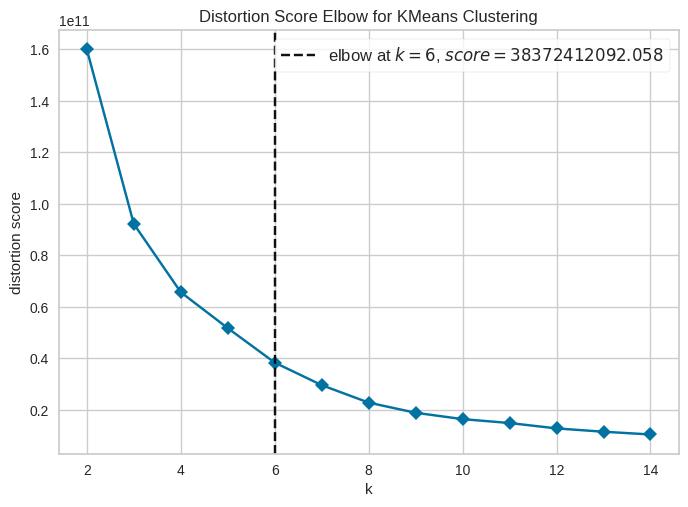

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
k_means = KMeans(init = 'k-means++', n_init=10, max_iter = 100, random_state = 0)
visualize = KElbowVisualizer(k_means, k=(2,15), timings = False)
visualize.fit(customer_data)
visualize.show()

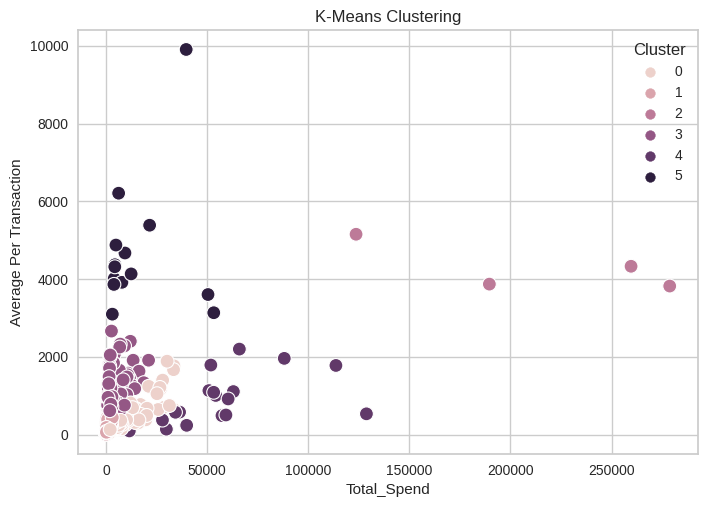

In [33]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

x = customer_data[['Num_Transactions', 'Total_Product_Purchased', 'Total_Spend', 'Average_Per_Transaction']]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Applying KMeans
kmeans = KMeans(n_clusters = 6, random_state = 1)
customer_data['Cluster'] = kmeans.fit_predict(x_scaled)

# Plotting
sns.scatterplot(x = 'Total_Spend', y = 'Average_Per_Transaction', hue= 'Cluster', data = customer_data, s =100)
plt.title('K-Means Clustering')
plt.xlabel('Total_Spend')
plt.ylabel('Average Per Transaction')
plt.legend(title = 'Cluster')
plt.show()


The above results are not very helpful. Let's look into it from a different perspective. Since its points are becoming saturated, let's try taking the log of the variables and see if it provides us with more insight into the data.


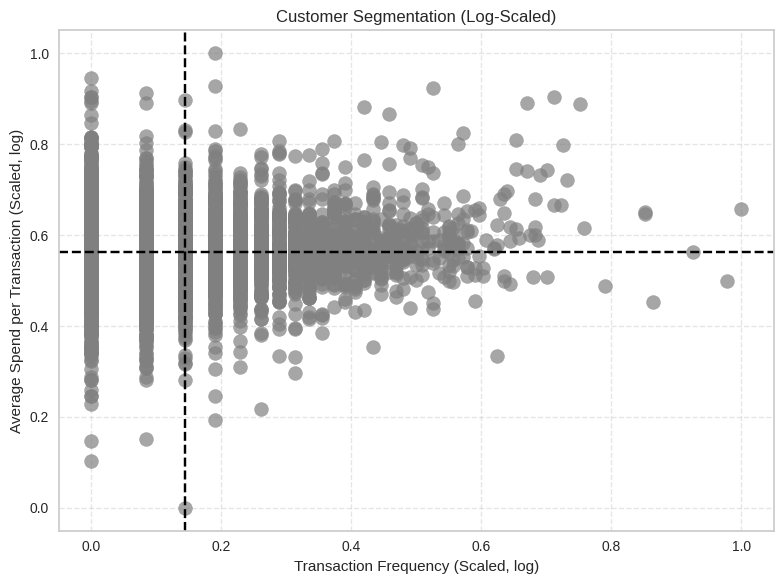

In [34]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Log-transform to reduce skew
customer_data['Num_Transactions_log'] = np.log1p(customer_data['Num_Transactions'])
customer_data['Average_Per_Transaction_log'] = np.log1p(customer_data['Average_Per_Transaction'])

# Scale the log-transformed data
scaler = MinMaxScaler()
customer_data[['Num_Transactions_Scaled', 'Average_Per_Transaction_Scaled']] = scaler.fit_transform(
    customer_data[['Num_Transactions_log', 'Average_Per_Transaction_log']]
)

# Compute medians for quadrant lines
freq_median = customer_data['Num_Transactions_Scaled'].median()
spend_median = customer_data['Average_Per_Transaction_Scaled'].median()

# Plot all data points in gray
plt.figure(figsize=(8, 6))
plt.scatter(
    customer_data['Num_Transactions_Scaled'],
    customer_data['Average_Per_Transaction_Scaled'],
    color='gray',
    alpha=0.7,
    s=100
)

# Draw median lines
plt.axvline(freq_median, color='black', linestyle='--')
plt.axhline(spend_median, color='black', linestyle='--')

# Labels and styling
plt.title('Customer Segmentation (Log-Scaled)')
plt.xlabel('Transaction Frequency (Scaled, log)')
plt.ylabel('Average Spend per Transaction (Scaled, log)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## What Now!!

Now, take a pause and ask, What can we do with the data?, What i want to achieve and how can i use the data to achieve it?

> #### Pro Tip!!
> 
> Always ask these questions timt to time when you are dealing wth data, it keeps you on right track.
> Data is a key to solving a lot of mysteries, sometimes it take us to intirely different path than we first initiated. We need to keep in mind how to utilise this abundance of knowledge to solve the mystery we are persuing.... 

Customer Segmentation can be performed in many different ways; the question is in which categories we want to segment and what we want to segment.
In here, I want to categorise the customers according to their expenditure potential. This way, we can target those who are spending less.

And from the above graph, it is clearly shown that our customers can be divided into four sections.
For this, I will use the *Johari Window* to visualise it more clearly.

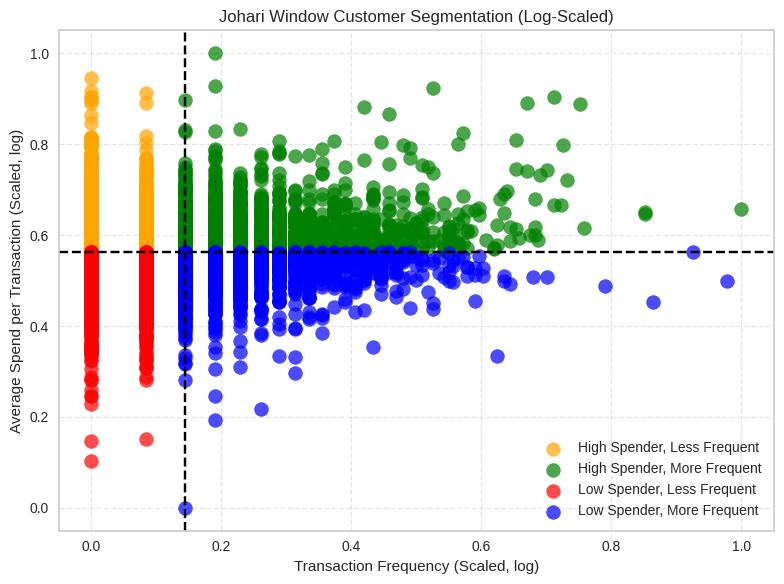

In [35]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Log-transform to reduce skew
customer_data['Num_Transactions_log'] = np.log1p(customer_data['Num_Transactions'])
customer_data['Average_Per_Transaction_log'] = np.log1p(customer_data['Average_Per_Transaction'])

# Scale the log-transformed data
scaler = MinMaxScaler()
customer_data[['Num_Transactions_Scaled', 'Average_Per_Transaction_Scaled']] = scaler.fit_transform(
    customer_data[['Num_Transactions_log', 'Average_Per_Transaction_log']]
)

# Compute medians for quadrant lines
freq_median = customer_data['Num_Transactions_Scaled'].median()
spend_median = customer_data['Average_Per_Transaction_Scaled'].median()

# Label each point
def label_row(row):
    freq_label = 'More Frequent' if row['Num_Transactions_Scaled'] >= freq_median else 'Less Frequent'
    spend_label = 'High Spender' if row['Average_Per_Transaction_Scaled'] >= spend_median else 'Low Spender'
    return f"{spend_label}, {freq_label}"

customer_data['Segment'] = customer_data.apply(label_row, axis=1)

# Plot Johari Window
import matplotlib.pyplot as plt

colors = {
    'High Spender, More Frequent': 'green',
    'High Spender, Less Frequent': 'orange',
    'Low Spender, Less Frequent': 'red',
    'Low Spender, More Frequent': 'blue'
}

plt.figure(figsize=(8, 6))
for segment, group in customer_data.groupby('Segment'):
    plt.scatter(
        group['Num_Transactions_Scaled'],
        group['Average_Per_Transaction_Scaled'],
        label=segment,
        color=colors.get(segment, 'gray'),
        alpha=0.7,
        s=100
    )

plt.axvline(freq_median, color='black', linestyle='--')
plt.axhline(spend_median, color='black', linestyle='--')
plt.title('Johari Window Customer Segmentation (Log-Scaled)')
plt.xlabel('Transaction Frequency (Scaled, log)')
plt.ylabel('Average Spend per Transaction (Scaled, log)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


From the above graph, we can target our customers accordingly and form a market strategy like coupons, discounts on specific products, bundles, etc.

Our main goal is to propose offers to our customer in a way that we can increase their frequency and expenditure value. In other words, tailored offers to push customers from their respective zones towards the green zone.


## Now Finale of this project: Recommendation System

For the recommendation system, I will display the recommendation to section one will be the products that are popular globally.
And in another section, it is recommended according to the behaviour pattern of the users.

In [36]:
import pandas as pd

# Filter out invalid/negative transactions
df_new_copy = df_new_copy[df_new_copy['Quantity'] > 0]

# Get top N best-selling products overall
best_selling_products = df_new_copy.groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index()
best_selling_products = best_selling_products.sort_values(by='Quantity', ascending=False)
top_products = best_selling_products.head(10)

# Record products purchased by each customer
customer_purchases = df_new_copy.groupby(['CustomerID', 'StockCode'])['Quantity'].sum().reset_index()

# Generate recommendations per customer
recommendations = []
for customer in customer_data_cleaned['CustomerID']:
    purchased_products = customer_purchases[customer_purchases['CustomerID'] == customer]['StockCode'].tolist()
    
    # Recommend top 3 best-sellers not purchased yet
    top_not_purchased = top_products[~top_products['StockCode'].isin(purchased_products)].head(3)
    
    recommendations.append([customer] + top_not_purchased[['StockCode', 'Description']].values.flatten().tolist())

# Create recommendations dataframe
recommendations_df = pd.DataFrame(recommendations, columns=[
    'CustomerID',
    'Rec1_StockCode', 'Rec1_Description',
    'Rec2_StockCode', 'Rec2_Description',
    'Rec3_StockCode', 'Rec3_Description'
])

# Merge with customer data
customer_data_with_recommendations = customer_data.merge(recommendations_df, on='CustomerID', how='left')

# Display sample recommendations
# print(customer_data_with_recommendations.sample(10, random_state=0))


In [37]:
customer_data_with_recommendations[['CustomerID', 'Rec1_StockCode', 'Rec1_Description','Rec2_StockCode', 'Rec2_Description', 'Rec3_StockCode', 'Rec3_Description']].head()

,CustomerID,Rec1_StockCode,Rec1_Description,Rec2_StockCode,Rec2_Description,Rec3_StockCode,Rec3_Description
0,12347.0,23843,"PAPER CRAFT , LITTLE BIRDIE",23166,MEDIUM CERAMIC TOP STORAGE JAR,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS
1,12348.0,23843,"PAPER CRAFT , LITTLE BIRDIE",23166,MEDIUM CERAMIC TOP STORAGE JAR,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS
2,12349.0,23843,"PAPER CRAFT , LITTLE BIRDIE",23166,MEDIUM CERAMIC TOP STORAGE JAR,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS
3,12350.0,23843,"PAPER CRAFT , LITTLE BIRDIE",23166,MEDIUM CERAMIC TOP STORAGE JAR,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS
4,12352.0,23843,"PAPER CRAFT , LITTLE BIRDIE",23166,MEDIUM CERAMIC TOP STORAGE JAR,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS


In [38]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity


# Transactions table 
df_new_copy = df_new_copy[df_new_copy['Quantity'] > 0] # keep only valid purchases

# Customer summary table 
customer_data_cleaned = customer_data_cleaned.drop_duplicates(subset=['CustomerID'])

# Create Customer-Product matrix
customer_product_matrix = df_new_copy.pivot_table(index='CustomerID',
                                         columns='StockCode',
                                         values='Quantity',
                                         aggfunc='sum',
                                         fill_value=0)


# Global Popular Products

global_popular = (df_new_copy.groupby(['StockCode', 'Description'])['Quantity']
                  .sum()
                  .reset_index()
                  .sort_values(by='Quantity', ascending=False))

top_global = global_popular[['StockCode', 'Description']].head(3)


# Personalized (User-User Similarity)
similarity_matrix = cosine_similarity(customer_product_matrix)
similarity_df = pd.DataFrame(similarity_matrix,
                             index=customer_product_matrix.index,
                             columns=customer_product_matrix.index)

def get_personal_recs(customer_id, top_n=3, neighbour_count=5):
    if customer_id not in similarity_df.index:
        return []

    # Find most similar customers (exclude self)
    similar_customers = similarity_df.loc[customer_id].sort_values(ascending=False).iloc[1:neighbour_count+1].index
    
    # Products current customer already purchased
    purchased = set(customer_product_matrix.loc[customer_id][customer_product_matrix.loc[customer_id] > 0].index)
    
    # Aggregate products from similar customers
    similar_products = (customer_product_matrix.loc[similar_customers].sum()
                        .sort_values(ascending=False))
    
    # Exclude already purchased
    recs = similar_products[~similar_products.index.isin(purchased)].head(top_n)
    
    # Map StockCode → Description
    recs_df = df_new_copy[df_new_copy['StockCode'].isin(recs.index)][['StockCode', 'Description']].drop_duplicates()
    return recs_df.head(top_n).values.tolist()

# Build Recommendation Table
recommendations = []
for customer in customer_product_matrix.index:
    # Global recommendations (same for all customers)
    global_recs = top_global.values.flatten().tolist()
    
    # Personalized recommendations
    personal_recs = get_personal_recs(customer, top_n=3)
    personal_recs_flat = [item for sublist in personal_recs for item in sublist]
    
    recommendations.append([customer] + global_recs + personal_recs_flat)

# Create Final DataFrame

recommendations_df = pd.DataFrame(recommendations, columns=[
    'CustomerID',
    'Global1_StockCode', 'Global1_Description',
    'Global2_StockCode', 'Global2_Description',
    'Global3_StockCode', 'Global3_Description',
    'Pers1_StockCode', 'Pers1_Description',
    'Pers2_StockCode', 'Pers2_Description',
    'Pers3_StockCode', 'Pers3_Description'
])

# Merge with customer profile (Table 2)
customer_data_with_recommendations = customer_data_cleaned.merge(recommendations_df, on='CustomerID', how='left')


#print(customer_data_with_recommendations.sample(5, random_state=0))


In [39]:
customer_data_with_recommendations[['CustomerID','Global1_StockCode', 'Global1_Description','Global2_StockCode', 'Global2_Description', 'Global3_StockCode', 'Global3_Description', 'Pers1_StockCode', 'Pers1_Description', 'Pers2_StockCode', 'Pers2_Description', 'Pers3_StockCode', 'Pers3_Description']].head()

,CustomerID,Global1_StockCode,Global1_Description,Global2_StockCode,Global2_Description,Global3_StockCode,Global3_Description,Pers1_StockCode,Pers1_Description,Pers2_StockCode,Pers2_Description,Pers3_StockCode,Pers3_Description
0,12347.0,23843,"PAPER CRAFT , LITTLE BIRDIE",23166,MEDIUM CERAMIC TOP STORAGE JAR,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,22418,10 COLOUR SPACEBOY PEN,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,23077,DOUGHNUT LIP GLOSS
1,12348.0,23843,"PAPER CRAFT , LITTLE BIRDIE",23166,MEDIUM CERAMIC TOP STORAGE JAR,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,21975,PACK OF 60 DINOSAUR CAKE CASES,21986,PACK OF 12 PINK POLKADOT TISSUES,23309,SET OF 60 I LOVE LONDON CAKE CASES
2,12349.0,23843,"PAPER CRAFT , LITTLE BIRDIE",23166,MEDIUM CERAMIC TOP STORAGE JAR,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,22378,WALL TIDY RETROSPOT,22649,STRAWBERRY FAIRY CAKE TEAPOT,22062,CERAMIC BOWL WITH LOVE HEART DESIGN
3,12350.0,23843,"PAPER CRAFT , LITTLE BIRDIE",23166,MEDIUM CERAMIC TOP STORAGE JAR,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,21232,STRAWBERRY CERAMIC TRINKET BOX,21291,SMALL POLKADOT CHOCOLATE GIFT BAG,21289,LARGE STRIPES CHOCOLATE GIFT BAG
4,12352.0,23843,"PAPER CRAFT , LITTLE BIRDIE",23166,MEDIUM CERAMIC TOP STORAGE JAR,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,22961,JAM MAKING SET PRINTED,22059,CERAMIC STRAWBERRY DESIGN MUG,22649,STRAWBERRY FAIRY CAKE TEAPOT
